## Using the letter_image Class

This notebook shows functions that process an image of a business letter in the letter_image class icluding: identifying the different parts of the letter in the image, showing those parts superimposed on the image, printing the text within each part, and displaying the ray text as detected by the OCR function (currently using tesseract).

### Instantiate the letter_image object and process the image

In [1]:
import os
import nltk.tag.stanford as st
import letter_image
import text_functions

# Directory containing the iamge
dataset_dir = "/media/datadr/datasets/letters" 

In [9]:
img_name= "letter_56"

# Instantiate a letter_image object
letter_obj = letter_image.letter_image(dataset_dir, img_name)
# Identify the different parts in the image and the text within each part
letter_obj.process_letter()


In [10]:
# letter_obj.clip is an array whose length is equal to the number of parts detected in the 
# image and contains the letter data
print("keys of each letter_obj.clip element",list(letter_obj.clip[0].keys()))


keys of each letter_obj.clip element ['text', 'contour', 'part']


### Display the position of each letter part within the image

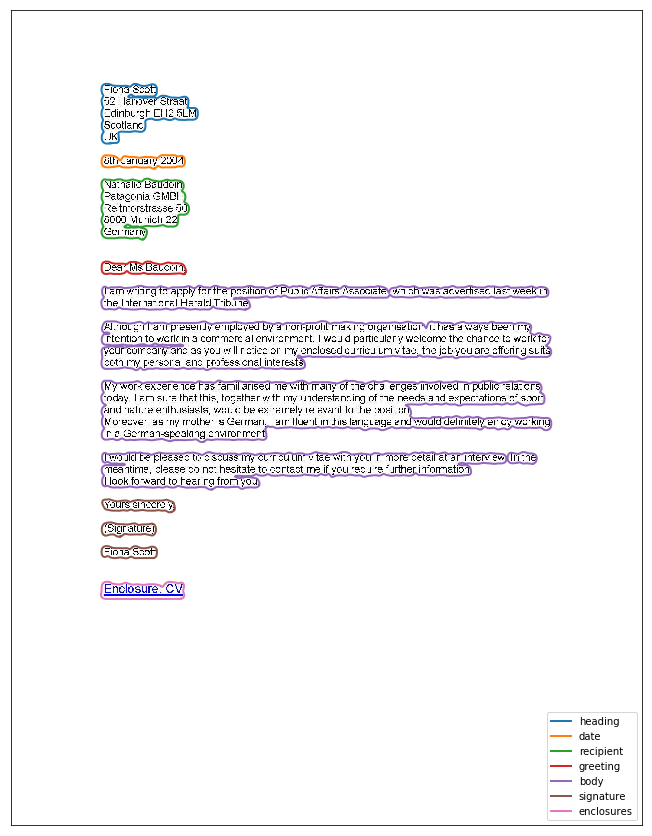

In [11]:
#Display where each detected part is located in the image
letter_obj.display_contours()

### Display the text contained in each part of the letter

In [12]:
letter_obj.display_letter_parts()

Fiona Scott

52 Hanover Straat
Edinburgh EH2 5LM
Scotland

UK

type:heading
8th January 2004

type:date
Nathalie Baudoin
Patagonia GMBH
Reitmorstrasse 50
8000 Munich 22
Germany

type:recipient
Dear Ms Baudoin,

type:greeting
I am writing to apply for the position of Public Affairs Associate, which was advertised last week in
the International Herald Tribune.

Although I am presently employed by a non-profit making organisation, it has always been my
intention to work in a commercial environment. I would particularly welcome the chance to work for

your company and as you will notice on my enclosed curriculum vitae, the job you are offering suits
both my personal and professional interests.

My work experience has familiarised me with many ofthe challenges involved in public relations
today. I am sure that this, together with my understanding ofthe needs and expectations of sport
and nature enthusiasts, would be extremely relevant to the position.

Moreover, as my mother is German, I am

## Learn More about the letter
### Who signed the letter?

In [13]:
# Create a dictionary/hash table of letter parts for easier access to each part
letter_content={}
for i,clip_item in enumerate(letter_obj.clip):
    letter_content[clip_item['part']] = clip_item['text']


In [14]:
letter_content['signature'][0]

'Yours sincerely,'

In [15]:
# Who signed this letter?

# Set up the NER tagger path and object.
# We will use the Stanford NER tagger
stanfordNER_path = "/home/reem/tools/stanford-ner-2018-10-16/"
english_nertagger = st.StanfordNERTagger(os.path.join(stanfordNER_path,\
                              "classifiers/english.all.3class.distsim.crf.ser.gz"), \
                              os.path.join(stanfordNER_path,\
                                           "stanford-ner.jar"))

signators = []
sig_part = letter_content['signature']
for sig_line in sig_part:
    for curr_line in sig_line.split("\n"):
        tagged=  english_nertagger.tag(curr_line.split())
        if ('PERSON' in [tagged[i][1] for i,tup in enumerate(tagged)]):
            signators.append(curr_line)
                
connector = 'Letter was signed by'
if (len(signators)<=0):
    print('No signator found!')
else:
    for _, sig in enumerate(signators):
        print("{} {}".format(connector, sig))
        connector=' and'

Letter was signed by Fiona Scott


### When was the letter written?

In [16]:
if 'date' in letter_content.keys():
    print("The letter\'s date is {}".format(letter_content['date'][0]))
else:
    print('No date Found!')

The letter's date is 8th January 2004


### Who was the letter sent to?

In [17]:
recipients = []
if 'date' in letter_content.keys():
    recipient_part = letter_content['recipient']
    for recip_line in recipient_part:
        for curr_line in recip_line.split("\n"):
            tagged=  english_nertagger.tag(curr_line.split())
            if ('PERSON' in [tagged[i][1] for i,tup in enumerate(tagged)]):
                recipients.append(curr_line)

    connector = 'Letter was sent to'
    if (len(recipients)<=0):
        print('No recipients found!')
    else:
        for _, recip in enumerate(recipients):
            print("{} {}".format(connector, recip))
            connector=' and'
else:
    print('No recipients found!')

Letter was sent to Nathalie Baudoin


### What is the summary of the letter


#### Get text of the letter body as a single string

In [18]:
letter_body = str.join(' ',letter_content['body'])
letter_body = letter_body.replace('\n', ' ')

In [19]:
print(letter_body)

I am writing to apply for the position of Public Affairs Associate, which was advertised last week in the International Herald Tribune. Although I am presently employed by a non-profit making organisation, it has always been my intention to work in a commercial environment. I would particularly welcome the chance to work for  your company and as you will notice on my enclosed curriculum vitae, the job you are offering suits both my personal and professional interests. My work experience has familiarised me with many ofthe challenges involved in public relations today. I am sure that this, together with my understanding ofthe needs and expectations of sport and nature enthusiasts, would be extremely relevant to the position.  Moreover, as my mother is German, I am fluent in this language and would definitely enjoy working in a German-speaking environment. I would be pleased to discuss my curriculum vitae with you in more detail at an interview. meantime, please do not hesitate to contac

#### Summarize using word embeddings

In [20]:
import text_functions

# the directory containing the Stanford GloVe model
# Change this to the proper path in your environment
glove_file = '/media/datadr/embeddings/glove.6B.100d.txt.word2vec'

text_obj = text_functions.text_functions_class(letter_body, glove_file)

In [21]:
sentence_distances, sorted_sent_indeces=text_obj.summarize()

In [30]:
# Display the top three sentences as the main summary sentence
for i in range(0,3):
    print("{}.\t{}".format(i+1,text_obj.clean_sentences[sorted_sent_indeces[i]]))

1.	meantime, please do not hesitate to contact me if you require further information.
2.	I would be pleased to discuss my curriculum vitae with you in more detail at an interview.
3.	I am writing to apply for the position of Public Affairs Associate, which was advertised last week in the International Herald Tribune.


#### Summarize using Gensim

There are many tools that implement different summarization methods. gensim is one of the most popular and its use is shown here.

In [23]:
from gensim.summarization import summarize
from gensim.summarization import textcleaner

# What sentences does Gensim use in summarization?
gensim_sents= textcleaner.split_sentences(letter_body)
for sent in gensim_sents:
    print(">>",sent)

>> I am writing to apply for the position of Public Affairs Associate, which was advertised last week in the International Herald Tribune.
>> Although I am presently employed by a non-profit making organisation, it has always been my intention to work in a commercial environment.
>> I would particularly welcome the chance to work for  your company and as you will notice on my enclosed curriculum vitae, the job you are offering suits both my personal and professional interests.
>> My work experience has familiarised me with many ofthe challenges involved in public relations today.
>> I am sure that this, together with my understanding ofthe needs and expectations of sport and nature enthusiasts, would be extremely relevant to the position.
>> Moreover, as my mother is German, I am fluent in this language and would definitely enjoy working in a German-speaking environment.
>> I would be pleased to discuss my curriculum vitae with you in more detail at an interview.
>> meantime, please do

In [29]:
gensim_min_num_setneces = 10 # a limit set by the gensim package itself

if (len(gensim_sents)<gensim_min_num_setneces):
    print("The letter has {} sentences which is less than the minimum limit of {} set by the Gensim package".format(\
        len(gensim_sents),gensim_min_num_setneces ))
else:
    print("Summary sentence:\n",summarize(letter_body))

Summary sentence:
 I would particularly welcome the chance to work for  your company and as you will notice on my enclosed curriculum vitae, the job you are offering suits both my personal and professional interests.


## Extras
### Functions to view the raw image, contours, and text 

These functions are useful for debugging

#### Display the input image

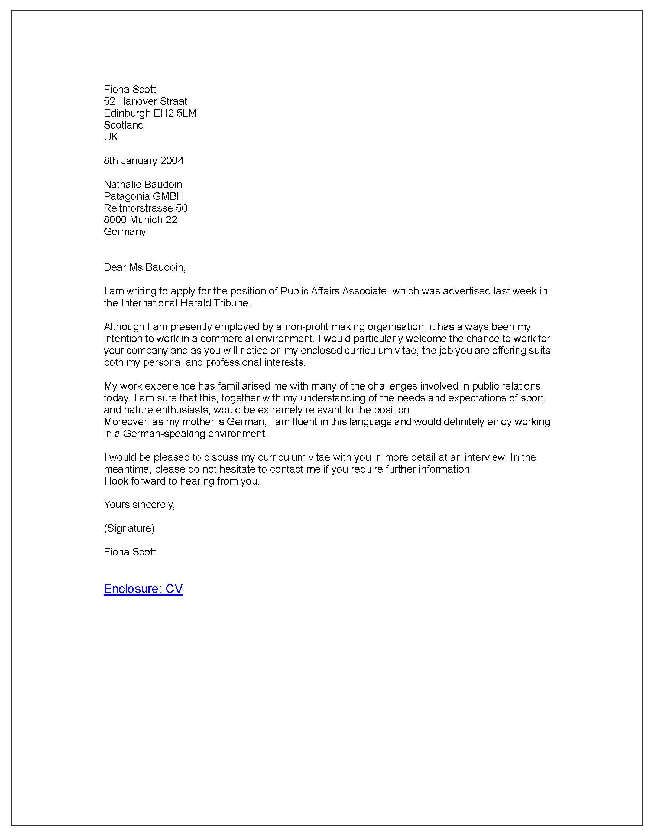

In [25]:
letter_obj.display_letter()

#### Print the raw OCR text within the image without segmenting the image

In [26]:
text = letter_obj.get_letter_text()
print(text)

:iona Scott

52 Hanover Straat
Edinburgh EH2 5LM
Scotland

JK

8th January 2004

Nathalie Baudoin
Datagonia GMBH
Qeitmorstrasse 50
8000 Munich 22
Germany

Dear Ms Baudoin,

am writing to apply for the position of Public Affairs Associate, which was advertised last week in
he International Herald Tribune.

 

Although I am presently employed by a non-profit making organisation, it has always been my
intention to work in a commercial environment. I would particularly welcome the chance to work for

your company and as you will notice on my enclosed curriculum vitae, the job you are offering suits
ooth my personal and professional interests.

My work experience has familiarised me with many ofthe challenges involved in public relations
oday. I am sure that this, together with my understanding ofthe needs and expectations of sport
and nature enthusiasts, would be extremely relevant to the position.

Moreover, as my mother is German, I am fluent in this language and would definitely enjoy w

#### Show  potential letter parts

Letter_image identifies areas in the image that resemble blocks of text in an image of a letter and surrounds those with a contour. Each contour is then checked to verify that it is indeed a text block, and a part name is assigned to it. Using get_contours() allows us to see the raw potential blocks. Each color in the displayed image represents an independent block.

/home/reem/.virtualenvs/dl4cv/lib/python3.5/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


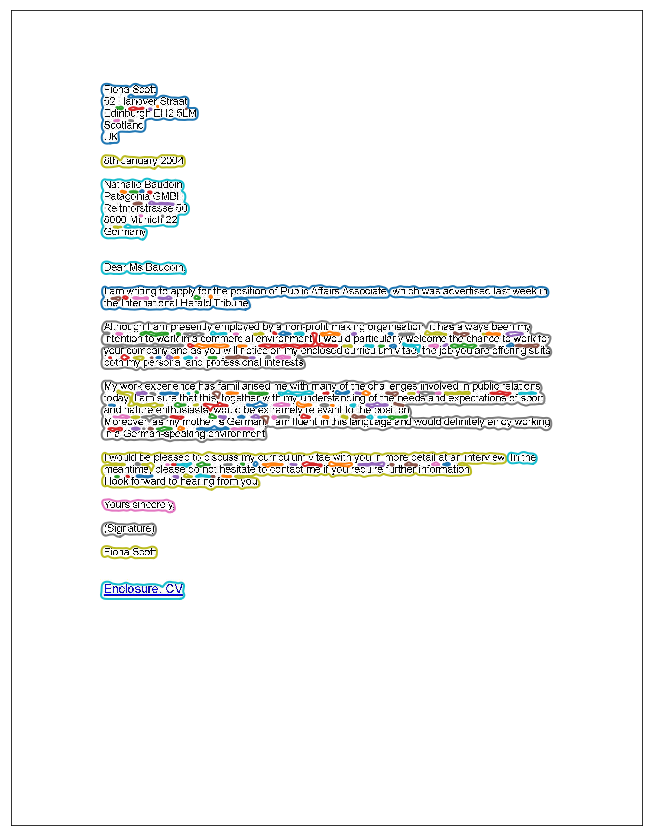

In [27]:
import matplotlib.pyplot as plt 

# The get_contours function identifies blocks in the image that represent potentially semantically related text
contours = letter_obj.get_contours()

fig, ax=plt.subplots(figsize=(15,15))
ax.imshow(letter_obj.letter_img)
            
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.tick_params(
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                left=False,
                right=False,
                labeltop=False,
                labelleft=False,
                labelright=False,
                labelbottom=False) # labels along the bottom edge are off
plt.show()